# sales-analysis-with-python



In [1]:
!pip install jovian --upgrade --quiet

In [2]:
import jovian

In [3]:
# Execute this to save new versions of the notebook
jovian.commit(project="sales-analysis-with-python")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chakradeosurabhi98/sales-analysis-with-python" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/chakradeosurabhi98/sales-analysis-with-python


'https://jovian.ai/chakradeosurabhi98/sales-analysis-with-python'

In [4]:
import os
import pandas as pd

### Merge data from each month into one CSV

In [5]:
path = "./Sales_Data"
files = [file for file in os.listdir(path) if not file.startswith('.')] # Ignore hidden files

all_months_data = pd.DataFrame()

for file in files:
    current_data = pd.read_csv(path+"/"+file)
    all_months_data = pd.concat([all_months_data, current_data])
    
all_months_data.to_csv("all_data.csv", index=False)

In [6]:
all_months_data.to_csv("all_data.csv", index=False)

### Read in updated dataframe

In [7]:
all_data = pd.read_csv("all_data.csv")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


## Clean up the data!

How to decide which data cleaning steps to be performed? --  you find things you need to clean as you perform operations and get errors. Based on the error, you decide how you should go about cleaning the data

#### Drop rows of NAN

In [8]:
# Find NAN
nan_df = all_data[all_data.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
58,NaN,NaN,NaN,NaN,NaN,NaN
111,NaN,NaN,NaN,NaN,NaN,NaN
522,NaN,NaN,NaN,NaN,NaN,NaN
839,NaN,NaN,NaN,NaN,NaN,NaN
1590,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
all_data = all_data.dropna(how='all')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001"
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001"
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001"
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001"
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101"


#### Get rid of text in order date column

In [10]:
temp_df = all_data[all_data['Order Date'].str[0:2] =='Or']

In [11]:
temp_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
964,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
973,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
975,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1318,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1355,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
...,...,...,...,...,...,...
183671,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184012,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184041,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
184275,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address


In [12]:
all_data = all_data[all_data['Order Date'].str[0:2]!='Or']

#### Correct data type of columns

In [13]:
all_data['Quantity Ordered'] = pd.to_numeric(all_data['Quantity Ordered'])

In [14]:
all_data['Price Each'] = pd.to_numeric(all_data['Price Each'])

In [15]:
jovian.commit(project="sales-analysis-with-python")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chakradeosurabhi98/sales-analysis-with-python" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/chakradeosurabhi98/sales-analysis-with-python


'https://jovian.ai/chakradeosurabhi98/sales-analysis-with-python'

## Adding Columns

### Adding month column

In [16]:
### Method-1 ###
all_data['Month'] = pd.to_datetime(all_data['Order Date']).dt.month
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


In [18]:
### Method-2 ###
all_data['Month'] = all_data['Order Date'].str[0:2]
all_data['Month'] = all_data['Month'].astype('int32')
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5


In [17]:
jovian.commit(project="sales-analysis-with-python")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chakradeosurabhi98/sales-analysis-with-python" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/chakradeosurabhi98/sales-analysis-with-python


'https://jovian.ai/chakradeosurabhi98/sales-analysis-with-python'

### Adding City Column

In [18]:
def get_city(address):
    return address.split(",")[1].strip(" ")

def get_state(address):
    return address.split(",")[2].split(" ")[1]

all_data['City'] = all_data['Purchase Address'].apply(lambda x: f"{get_city(x)}  ({get_state(x)})")
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,New York City (NY)
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,Dallas (TX)
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,New York City (NY)
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,Dallas (TX)
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,Seattle (WA)


### Add Sales Column

In [19]:
all_data['Sales'] = all_data['Quantity Ordered'] * all_data['Price Each']
all_data.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,City,Sales
0,194095,Wired Headphones,1,11.99,05/16/19 17:14,"669 2nd St, New York City, NY 10001",5,New York City (NY),11.99
1,194096,AA Batteries (4-pack),1,3.84,05/19/19 14:43,"844 Walnut St, Dallas, TX 75001",5,Dallas (TX),3.84
2,194097,27in FHD Monitor,1,149.99,05/24/19 11:36,"164 Madison St, New York City, NY 10001",5,New York City (NY),149.99
3,194098,Wired Headphones,1,11.99,05/02/19 20:40,"622 Meadow St, Dallas, TX 75001",5,Dallas (TX),11.99
4,194099,AAA Batteries (4-pack),2,2.99,05/11/19 22:55,"17 Church St, Seattle, WA 98101",5,Seattle (WA),5.98


## Data Exploration!

#### Question 1: What was the best month for sales? How much was earned that month?
#### Answer : December was the best month for sales .  The sales was around 46 lakhs.

In [21]:
results = all_data.groupby('Month').sum()

In [22]:
results

,Quantity Ordered,Price Each,Sales
Month,,,
1,10903,1811768.38,1822256.73
2,13449,2188884.72,2202022.42
3,17005,2791207.83,2807100.38
4,20558,3367671.02,3390670.24
5,18667,3135125.13,3152606.75
6,15253,2562025.61,2577802.26
7,16072,2632539.56,2647775.76
8,13448,2230345.42,2244467.88
9,13109,2084992.09,2097560.13


Text(0.5, 0, 'Month')

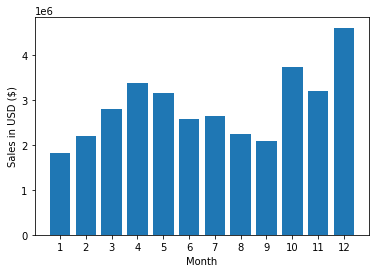

In [23]:
import matplotlib.pyplot as plt
months = range(1,13)
plt.bar(months , results['Sales'])
plt.xticks(months)
plt.ylabel('Sales in USD ($)')
plt.xlabel('Month')

##### Here, we have calculated the sum of sales per month and plotted it in a bar graph to understand which month has the maximum sales

#### Question 2: What city sold the most product?
#### Answer : San Francisco has sold the maximum products.

In [24]:
all_data.groupby('City').sum()

,Quantity Ordered,Price Each,Month,Sales
City,,,,
Atlanta (GA),16602,2779908.20,104794,2795498.58
Austin (TX),11153,1809873.61,69829,1819581.75
Boston (MA),22528,3637409.77,141112,3661642.01
Dallas (TX),16730,2752627.82,104620,2767975.40
Los Angeles (CA),33289,5421435.23,208325,5452570.80
New York City (NY),27932,4635370.83,175741,4664317.43
Portland (ME),2750,447189.25,17144,449758.27
Portland (OR),11303,1860558.22,70621,1870732.34
San Francisco (CA),50239,8211461.74,315520,8262203.91


In [25]:
jovian.commit(project="sales-analysis-with-python")

<IPython.core.display.Javascript object>

[jovian] Updating notebook "chakradeosurabhi98/sales-analysis-with-python" on https://jovian.ai
[jovian] Committed successfully! https://jovian.ai/chakradeosurabhi98/sales-analysis-with-python


'https://jovian.ai/chakradeosurabhi98/sales-analysis-with-python'

Text(0.5, 0, 'City')

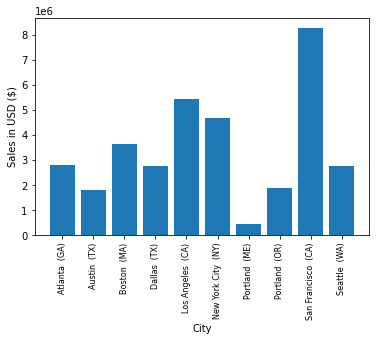

In [28]:
results = all_data.groupby('City').sum()
cities = [city for city , df in all_data.groupby('City')]
plt.bar(cities , results['Sales'])
plt.xticks(cities , rotation = 'vertical' , size =8)
plt.ylabel('Sales in USD ($)')
plt.xlabel('City')


ValueError: No axis named Month for object type DataFrame

#### Question 3: What time should we display advertisements to maximize likelihood of customer's buying product?
#### Answer : We can see maximum sales are at 11 am and 7 pm. We should advertise slightly before 11 am or 7 pm to maximize likelihood of customer's buying product.

In [29]:
all_data['Order Date'] = pd.to_datetime(all_data['Order Date'])

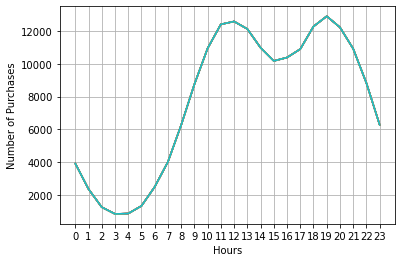

In [30]:
all_data['Hour'] = all_data['Order Date'].dt.hour
all_data['Minute'] = all_data['Order Date'].dt.minute
hours = [hour for hour , df in all_data.groupby('Hour')]
plt.plot(hours , all_data.groupby(['Hour']).count())
plt.xticks(hours)
plt.xlabel('Hours')
plt.ylabel('Number of Purchases')
plt.grid()

# My recommendation is slightly before 11am or 7pm

##### Here we have plotted the number of purchases throughout the day at an interval of one hour to find out the general trend of when does the store have maximum purchases. 

In [ ]:
jovian.commit(project="sales-analysis-with-python")

<IPython.core.display.Javascript object>

#### Question 4: What products are most often sold together?
#### Answer : Iphone and Lighting Charging Cable are sold together most often.

In [34]:
# https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
df = all_data[all_data['Order ID'].duplicated(keep=False)]

# Referenced: https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))
df[['Order ID', 'Grouped']].drop_duplicates()

/tmp/ipykernel_36/2507253887.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Grouped'] = df.groupby('Order ID')['Product'].transform(lambda x: ','.join(x))


,Order ID,Grouped
15,194110,"Google Phone,Wired Headphones"
77,194170,"Google Phone,USB-C Charging Cable"
82,194174,"iPhone,Lightning Charging Cable,Wired Headphones"
89,194179,"Flatscreen TV,AAA Batteries (4-pack)"
103,194192,"Wired Headphones,Bose SoundSport Headphones"
...,...,...
186798,222863,"27in FHD Monitor,Bose SoundSport Headphones"
186804,222868,"iPhone,Apple Airpods Headphones"
186819,222882,"Apple Airpods Headphones,AA Batteries (4-pack)"
186822,222884,"Google Phone,USB-C Charging Cable"


In [35]:
# Referenced: https://stackoverflow.com/questions/52195887/counting-unique-pairs-of-numbers-into-a-python-dictionary
from itertools import combinations
from collections import Counter

count = Counter()

for row in df['Grouped']:
    row_list = row.split(',')
    count.update(Counter(combinations(row_list, 2)))

for key,value in count.most_common(10):
    print(key, value)

('iPhone', 'Lightning Charging Cable') 2140
('Google Phone', 'USB-C Charging Cable') 2116
('iPhone', 'Wired Headphones') 987
('Google Phone', 'Wired Headphones') 949
('iPhone', 'Apple Airpods Headphones') 799
('Vareebadd Phone', 'USB-C Charging Cable') 773
('Google Phone', 'Bose SoundSport Headphones') 503
('USB-C Charging Cable', 'Wired Headphones') 452
('Vareebadd Phone', 'Wired Headphones') 327
('Lightning Charging Cable', 'Wired Headphones') 253


#### Question 5 : What product sold the most? Why do you think it sold the most?
#### Answer : AAA Batteries (4-pack) have been sold the most as it has maximum usage and lowest price.

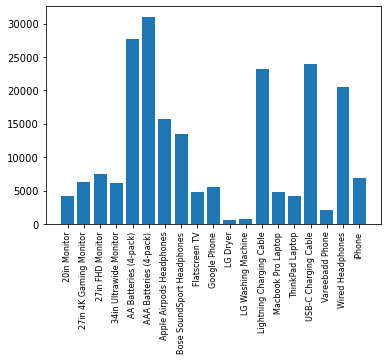

In [37]:
product_group = all_data.groupby('Product')
quantity_ordered = product_group.sum()['Quantity Ordered']

keys = [pair for pair, df in product_group]
plt.bar(keys, quantity_ordered)
plt.xticks(keys, rotation='vertical', size=8)
plt.show()

/tmp/ipykernel_36/136096346.py:14: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax1.set_xticklabels(keys, rotation='vertical', size=8)


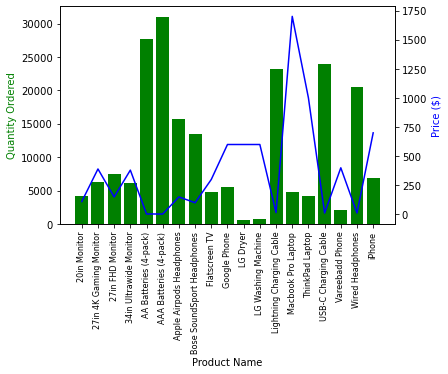

In [38]:
# Referenced: https://stackoverflow.com/questions/14762181/adding-a-y-axis-label-to-secondary-y-axis-in-matplotlib

prices = all_data.groupby('Product').mean()['Price Each']

fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(keys, quantity_ordered, color='g')
ax2.plot(keys, prices, color='b')

ax1.set_xlabel('Product Name')
ax1.set_ylabel('Quantity Ordered', color='g')
ax2.set_ylabel('Price ($)', color='b')
ax1.set_xticklabels(keys, rotation='vertical', size=8)

fig.show()

##### Here we have plotted the amount of sales of every item alongwith the price of the item to find the correlation between the price and amount of products sold.

## Inferences

1. According to the sales data per month, we can see maximum sales is in the month of December. The store can target more off-season offers and recommendations to increase the sales in other months.
2. We can see San Francisco has the maximum sale out of all the cities. We can further analyze what is different in SF store that is generating more sales. We can then try to replicate similar model across all stores to increase the sales.
3. From the third graph, we see that maximum purchases in the store are between 11 am to 7 pm. We can use this information for multiple things. We can use it to decide when we should be displaying the advertisements so that people are more likely to buy that product. WE can use this information to decide to distribute th
4. We have observed that some of the items are mostly sold together. We can use this information to provide combo offers for these 2 products or 3 products.
5. From the fifth graph , we can find out which products are sold the most and accordingly we can decide on the placement of products in the store.

References :
https://stackoverflow.com/questions/43348194/pandas-select-rows-if-id-appear-several-time
https://stackoverflow.com/questions/27298178/concatenate-strings-from-several-rows-using-pandas-groupby
https://www.geeksforgeeks.org/pandas-tutorial/
https://stackoverflow.com/questions/65308669/how-to-calculate-total-sales-per-client-python
